In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway, ttest_ind, shapiro, pearsonr

## Import Data (customers):

In [510]:
customers = pd.read_csv('customers.csv')
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [511]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [512]:
customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


## Cleaning Data:

In [513]:
customers.duplicated(subset=['client_id']).sum()

0

In [514]:
customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

## Import Data (products):

In [515]:
products = pd.read_csv('products.csv')
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [516]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [517]:
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [518]:
products.categ.unique()

array([0, 1, 2])

## Cleaning Data:

In [519]:
products.duplicated(subset=['id_prod']).sum()

0

In [520]:
products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [521]:
products[products['price'] == -1]

,id_prod,price,categ
731,T_0,-1.0,0


In [522]:
products = products.drop(products.index[731])
products.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


## Import Data (transactions):

In [523]:
transactions = pd.read_csv('transactions.csv')
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [524]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [525]:
transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


## Cleaning Data:

In [526]:
transactions[['date', 'reference']] = transactions.date.str.split('.', expand=True)
transactions[['date', 'heure']] = transactions.date.str.split(' ', expand=True)
transactions.head()

,id_prod,date,session_id,client_id,reference,heure
0,0_1518,2022-05-20,s_211425,c_103,043970,13:21:29
1,1_251,2022-02-02,s_158752,c_8534,149409,07:55:19
2,0_1277,2022-06-18,s_225667,c_6714,155329,15:44:33
3,2_209,2021-06-24,s_52962,c_6941,835891,04:19:29
4,0_1509,2023-01-11,s_325227,c_4232,194479,08:22:08


In [527]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
reference     object
heure         object
dtype: object

In [528]:
transactions.date.unique()

array(['2022-05-20', '2022-02-02', '2022-06-18', '2021-06-24',
       '2023-01-11', '2022-10-20', '2022-06-03', '2021-06-26',
       '2022-12-27', '2021-11-29', '2022-10-07', '2021-06-06',
       '2023-02-12', '2022-04-28', '2021-09-04', '2021-08-18',
       '2022-05-08', '2022-09-13', '2021-09-20', '2022-02-28',
       '2023-01-15', '2023-02-04', '2023-01-13', '2021-08-24',
       '2021-12-14', '2022-07-24', '2021-05-16', '2021-05-03',
       '2022-02-03', '2022-07-27', '2022-07-01', '2021-06-21',
       '2021-07-07', '2022-03-19', '2022-04-23', '2021-12-10',
       '2021-09-02', '2022-09-30', '2022-08-23', '2021-12-02',
       '2022-05-30', '2021-05-28', '2022-02-07', '2023-02-26',
       '2023-02-01', '2022-09-16', '2022-03-23', '2021-09-25',
       '2022-07-13', '2021-07-23', '2021-05-18', '2022-07-17',
       '2022-06-16', '2022-07-11', '2022-10-01', '2021-12-09',
       '2021-09-05', '2021-03-27', '2021-09-01', '2021-09-29',
       '2022-01-01', '2022-05-01', '2021-05-06', '2022-

In [529]:
transactions['date'] = transactions.date.replace(['test_2021-03-01'], '2021-03-01')

In [530]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [531]:
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month
transactions['day'] = transactions['date'].dt.day
transactions.head()

,id_prod,date,session_id,client_id,reference,heure,year,month,day
0,0_1518,2022-05-20,s_211425,c_103,043970,13:21:29,2022,5,20
1,1_251,2022-02-02,s_158752,c_8534,149409,07:55:19,2022,2,2
2,0_1277,2022-06-18,s_225667,c_6714,155329,15:44:33,2022,6,18
3,2_209,2021-06-24,s_52962,c_6941,835891,04:19:29,2021,6,24
4,0_1509,2023-01-11,s_325227,c_4232,194479,08:22:08,2023,1,11


In [532]:
transactions['reference'] = transactions.reference.astype(int)

In [533]:
transactions.duplicated(subset=['id_prod', 'session_id', 'client_id']).sum()

1025

In [534]:
transactions.drop_duplicates(subset=['id_prod', 'session_id', 'client_id'])

,id_prod,date,session_id,client_id,reference,heure,year,month,day
0,0_1518,2022-05-20,s_211425,c_103,43970,13:21:29,2022,5,20
1,1_251,2022-02-02,s_158752,c_8534,149409,07:55:19,2022,2,2
2,0_1277,2022-06-18,s_225667,c_6714,155329,15:44:33,2022,6,18
3,2_209,2021-06-24,s_52962,c_6941,835891,04:19:29,2021,6,24
4,0_1509,2023-01-11,s_325227,c_4232,194479,08:22:08,2023,1,11
...,...,...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15,s_150195,c_8489,246925,13:05:06,2022,1,15
679528,1_639,2022-03-19,s_181434,c_4370,429229,16:03:23,2022,3,19
679529,0_1425,2022-12-20,s_314704,c_304,584749,04:33:37,2022,12,20
679530,0_1994,2021-07-16,s_63204,c_2227,350579,20:36:35,2021,7,16


In [535]:
transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
reference     0
heure         0
year          0
month         0
day           0
dtype: int64

### Jointure,  calcul du CA, du Nb de vente et du panier moyen:

#### Jointure sur les tables transactions et products

In [536]:
#Jointure1:
chiffre = transactions.merge(products, on='id_prod', how='left')
chiffre.head()

,id_prod,date,session_id,client_id,reference,heure,year,month,day,price,categ
0,0_1518,2022-05-20,s_211425,c_103,43970,13:21:29,2022,5,20,4.18,0.0
1,1_251,2022-02-02,s_158752,c_8534,149409,07:55:19,2022,2,2,15.99,1.0
2,0_1277,2022-06-18,s_225667,c_6714,155329,15:44:33,2022,6,18,7.99,0.0
3,2_209,2021-06-24,s_52962,c_6941,835891,04:19:29,2021,6,24,69.99,2.0
4,0_1509,2023-01-11,s_325227,c_4232,194479,08:22:08,2023,1,11,4.99,0.0


In [537]:
chiffre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679532 entries, 0 to 679531
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679532 non-null  object        
 1   date        679532 non-null  datetime64[ns]
 2   session_id  679532 non-null  object        
 3   client_id   679532 non-null  object        
 4   reference   679532 non-null  int64         
 5   heure       679532 non-null  object        
 6   year        679532 non-null  int64         
 7   month       679532 non-null  int64         
 8   day         679532 non-null  int64         
 9   price       679111 non-null  float64       
 10  categ       679111 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 62.2+ MB


In [538]:
chiffre.describe()

,reference,year,month,day,price,categ
count,679532.000000,679532.000000,679532.000000,679532.000000,679111.000000,679111.000000
mean,499816.610323,2021.670305,6.503323,15.759546,17.454773,0.441953
std,288454.682180,0.617570,3.480723,8.805453,18.328998,0.595042
min,4.000000,2021.000000,1.000000,1.000000,0.620000,0.000000
25%,249921.000000,2021.000000,3.000000,8.000000,8.870000,0.000000
50%,499590.000000,2022.000000,6.000000,16.000000,13.990000,0.000000
75%,749427.500000,2022.000000,9.000000,23.000000,18.990000,1.000000
max,999996.000000,2023.000000,12.000000,31.000000,300.000000,2.000000


In [539]:
chiffre.duplicated(subset=(['id_prod', 'session_id', 'client_id'])).sum()

1025

In [540]:
chiffre = chiffre.drop_duplicates(subset=(['id_prod', 'session_id', 'client_id']))

#### Jointure des tables chiffre et customers:

In [541]:
#Jointure2:
df = chiffre.merge(customers, on='client_id', how='left')
df.head()

,id_prod,date,session_id,client_id,reference,heure,year,month,day,price,categ,sex,birth
0,0_1518,2022-05-20,s_211425,c_103,43970,13:21:29,2022,5,20,4.18,0.0,f,1986
1,1_251,2022-02-02,s_158752,c_8534,149409,07:55:19,2022,2,2,15.99,1.0,m,1988
2,0_1277,2022-06-18,s_225667,c_6714,155329,15:44:33,2022,6,18,7.99,0.0,f,1968
3,2_209,2021-06-24,s_52962,c_6941,835891,04:19:29,2021,6,24,69.99,2.0,m,2000
4,0_1509,2023-01-11,s_325227,c_4232,194479,08:22:08,2023,1,11,4.99,0.0,m,1980


In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678507 entries, 0 to 678506
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     678507 non-null  object        
 1   date        678507 non-null  datetime64[ns]
 2   session_id  678507 non-null  object        
 3   client_id   678507 non-null  object        
 4   reference   678507 non-null  int64         
 5   heure       678507 non-null  object        
 6   year        678507 non-null  int64         
 7   month       678507 non-null  int64         
 8   day         678507 non-null  int64         
 9   price       678284 non-null  float64       
 10  categ       678284 non-null  float64       
 11  sex         678507 non-null  object        
 12  birth       678507 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 72.5+ MB


In [543]:
df.describe()

,reference,year,month,day,price,categ,birth
count,678507.000000,678507.000000,678507.000000,678507.000000,678284.000000,678284.000000,678507.000000
mean,499932.611106,2021.670479,6.504549,15.764652,17.450650,0.441787,1977.808606
std,288461.575349,0.617539,3.480698,8.803260,18.324117,0.594888,13.574492
min,4.000000,2021.000000,1.000000,1.000000,0.620000,0.000000,1929.000000
25%,250175.500000,2021.000000,3.000000,8.000000,8.870000,0.000000,1970.000000
50%,499798.000000,2022.000000,6.000000,16.000000,13.990000,0.000000,1980.000000
75%,749595.000000,2022.000000,9.000000,23.000000,18.990000,1.000000,1987.000000
max,999996.000000,2023.000000,12.000000,31.000000,300.000000,2.000000,2004.000000


In [544]:
df.duplicated(subset=(['id_prod', 'session_id', 'client_id'])).sum()

0

#### Indicateur de base:

In [545]:
#Nombre de vente:
vente = df.session_id.count()
print('Nombre de ventes:', vente)

Nombre de ventes: 678507


In [546]:
#Calcul du CA:
ca = df.price.sum()
print("Chiffre d'affaire:", ca.round(2))

Chiffre d'affaire: 11836496.99


In [547]:
#Panier moyen:
panier = ca/vente
print('panier moyen:', panier.round(2))

panier moyen: 17.44


### 1) Analyse du chiffre d'affaire dans le temps:

In [548]:
# calcul du chiffre d'affaire par mois:
chiffre_per_month = df.groupby(['month', 'year', 'categ']).price.sum().reset_index()
chiffre_per_month = chiffre_per_month.rename(columns={'price':'ca'})
chiffre_per_month.head()

,month,year,categ,ca
0,1,2022,0.0,164087.78
1,1,2022,1.0,255855.84
2,1,2022,2.0,104805.69
3,1,2023,0.0,181039.31
4,1,2023,1.0,209854.45


#### Analyse sur l'année 2021

In [549]:
# Année 2021:
chiffre_2021 = chiffre_per_month[chiffre_per_month['year'] == 2021]
chiffre_2021.head()

,month,year,categ,ca
12,3,2021,0.0,193404.91
13,3,2021,1.0,186747.68
14,3,2021,2.0,101837.27
18,4,2021,0.0,204927.31
19,4,2021,1.0,155998.12


In [550]:
# calcul chiffre d'affaire:
print('chiffre 2021:',chiffre_2021.ca.sum().round(2))

chiffre 2021: 4764537.13


#### Analyse sur l'année 2022

In [551]:
# Année 2022:
chiffre_2022 = chiffre_per_month[chiffre_per_month['year'] == 2022]
chiffre_2022.head()

,month,year,categ,ca
0,1,2022,0.0,164087.78
1,1,2022,1.0,255855.84
2,1,2022,2.0,104805.69
6,2,2022,0.0,182964.20
7,2,2022,1.0,212765.47


In [552]:
# calcul chiffre d'affaire
print('chiffre 2022:',chiffre_2022.ca.sum().round(2))

chiffre 2022: 6099289.95


#### Analyse sur l'année 2023

In [553]:
# Année 2023:
chiffre_2023 = chiffre_per_month[chiffre_per_month['year'] == 2023]
chiffre_2023.head()

,month,year,categ,ca
3,1,2023,0.0,181039.31
4,1,2023,1.0,209854.45
5,1,2023,2.0,125809.23
9,2,2023,0.0,162248.36
10,2,2023,1.0,180122.70


In [554]:
print('chiffre 2023:',chiffre_2023.ca.sum().round(2))

chiffre 2023: 972669.91


#### Graphique

In [555]:
data1 = df[['date', 'price', 'categ']]
data1 = data1.rename(columns={'price':'ca'})
data1['month'] = data1['date'].dt.strftime('%Y/%m')
data1 = data1.groupby('month').ca.sum().reset_index()
data1.head()

,month,ca
0,2021/03,481989.86
1,2021/04,475410.58
2,2021/05,492140.59
3,2021/06,483466.03
4,2021/07,481841.22


In [556]:
#moyenne mobile
data2 = data1
moyenne_mobile = data1.rolling(3,min_periods=1).mean()
data2['moyenne_mobile'] = moyenne_mobile
data2.head()

,month,ca,moyenne_mobile
0,2021/03,481989.86,481989.860000
1,2021/04,475410.58,478700.220000
2,2021/05,492140.59,483180.343333
3,2021/06,483466.03,483672.400000
4,2021/07,481841.22,485815.946667


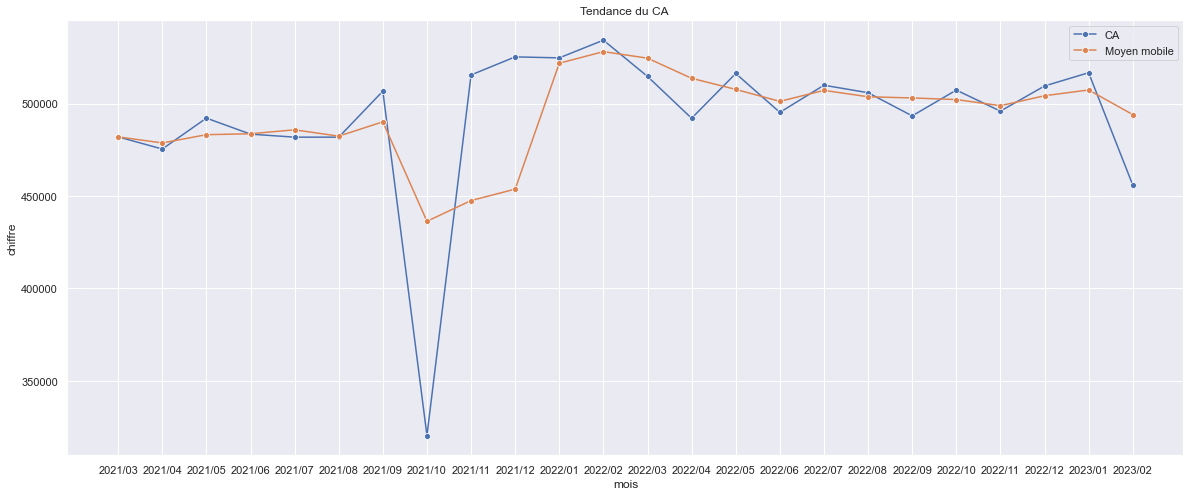

In [557]:
#Graph 4:
plt.figure(figsize=(20,8))
sns.set_theme(style='darkgrid')

sns.lineplot(data=data1, x='month', y='ca', marker='o', label='CA')
sns.lineplot(data=data2, x='month', y='moyenne_mobile', marker='o', label='Moyen mobile')

plt.title("Tendance du CA ")
plt.xlabel('mois')
plt.ylabel('chiffre')

plt.show()

In [558]:
data3 = df[['date', 'price', 'categ']]
data3['month'] = data3['date'].dt.strftime('%Y/%m')
data3 = data3.groupby(['month', 'categ']).price.sum().reset_index()
data3 = data3.rename(columns={'price':'ca'})
data3 = data3[['month', 'categ', 'ca']]
data3.head()

<ipython-input-558-0e11527d1956>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['month'] = data3['date'].dt.strftime('%Y/%m')


,month,categ,ca
0,2021/03,0.0,193404.91
1,2021/03,1.0,186747.68
2,2021/03,2.0,101837.27
3,2021/04,0.0,204927.31
4,2021/04,1.0,155998.12


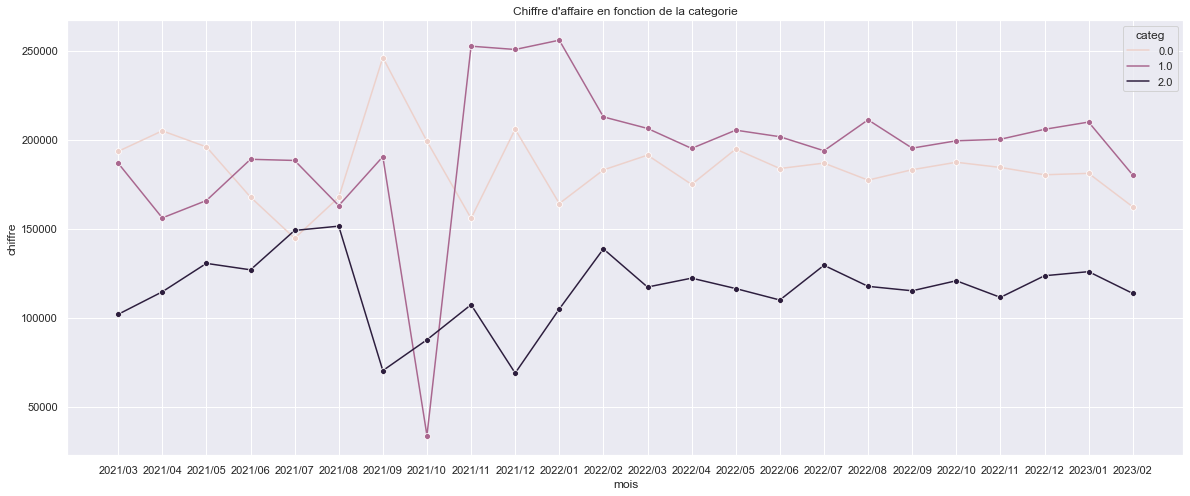

In [559]:
plt.figure(figsize=(20, 8))
sns.set_theme(style="darkgrid")

sns.lineplot(data=data3, x='month', y='ca', hue='categ', marker='o')


plt.title("Chiffre d'affaire en fonction de la categorie")
plt.xlabel('mois')
plt.ylabel('chiffre')


plt.show()

In [560]:
#Vérification du chiffre octobre/2021:
chiffre2 = df[['year', 'month', 'categ', 'price']]
chiffre3 = chiffre2.groupby(['year', 'month', 'categ']).price.sum().reset_index()
chiffre4 = chiffre3[(chiffre3['month']==10) & (chiffre3['year']==2021)]
chiffre4 = chiffre4.rename(columns={'price':'ca'})
chiffre4.head()

,year,month,categ,ca
21,2021,10,0.0,199071.60
22,2021,10,1.0,33735.72
23,2021,10,2.0,87540.21


In [561]:
#Exclure le mois d'octobre 2021 pour eviter de biaisé nos données:
df.drop(df.loc[(df['month']==10)&(df['year']==2021)].index, inplace=True)
df.head()

,id_prod,date,session_id,client_id,reference,heure,year,month,day,price,categ,sex,birth
0,0_1518,2022-05-20,s_211425,c_103,43970,13:21:29,2022,5,20,4.18,0.0,f,1986
1,1_251,2022-02-02,s_158752,c_8534,149409,07:55:19,2022,2,2,15.99,1.0,m,1988
2,0_1277,2022-06-18,s_225667,c_6714,155329,15:44:33,2022,6,18,7.99,0.0,f,1968
3,2_209,2021-06-24,s_52962,c_6941,835891,04:19:29,2021,6,24,69.99,2.0,m,2000
4,0_1509,2023-01-11,s_325227,c_4232,194479,08:22:08,2023,1,11,4.99,0.0,m,1980


In [562]:
#Courbe sans octobre/2021

In [563]:
data1 = df[['date', 'price', 'categ']]
data1 = data1.rename(columns={'price':'ca'})
data1['month'] = data1['date'].dt.strftime('%Y/%m')
data1 = data1.groupby('month').ca.sum().reset_index()
data1.head()

,month,ca
0,2021/03,481989.86
1,2021/04,475410.58
2,2021/05,492140.59
3,2021/06,483466.03
4,2021/07,481841.22


In [564]:
#moyenne mobile
data2 = data1
moyenne_mobile = data1.rolling(3,min_periods=1).mean()
data2['moyenne_mobile'] = moyenne_mobile
data2.head()

,month,ca,moyenne_mobile
0,2021/03,481989.86,481989.860000
1,2021/04,475410.58,478700.220000
2,2021/05,492140.59,483180.343333
3,2021/06,483466.03,483672.400000
4,2021/07,481841.22,485815.946667


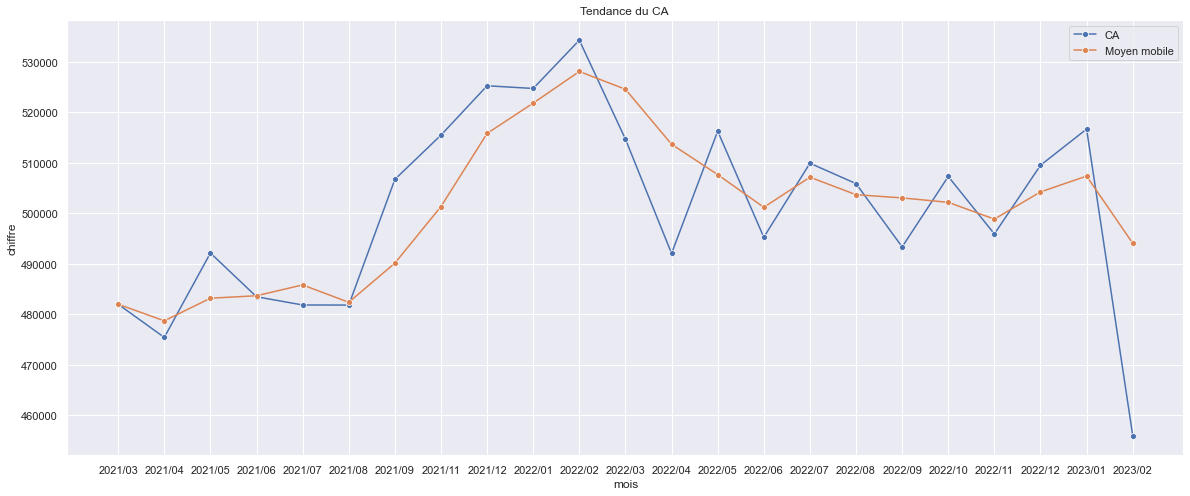

In [565]:
#Graph 4:
plt.figure(figsize=(20,8))
sns.set_theme(style='darkgrid')

sns.lineplot(data=data1, x='month', y='ca', marker='o', label='CA')
sns.lineplot(data=data2, x='month', y='moyenne_mobile', marker='o', label='Moyen mobile')

plt.title("Tendance du CA ")
plt.xlabel('mois')
plt.ylabel('chiffre')

plt.show()

#### Conclusion : L' analyse effectué sur le CA sur les différentes années. Nous donne comme information un CA en décroissance depuis février/2022. Une indication sur un biais concernant les données de la catégories 1 sur octobre/2021 (Graph2). Et pour terminé un classement du CA par catégories qui donne: 2<0<1.


#### Axe d’amélioration: Pour améliorer notre compréhension du CA, il faut récupérer les données biaisées sur octobre/2021. Il serait intéressant d’un point de vue marketing de ce concentrer sur les ventes liées à la catégorie 2. En effet, cette catégorie est sous-représenté dans le CA et en améliorer ces ventes permettra de faire croitre notre CA de manière globale.

### 2) Analyses du chiffre par catégories:

#### Dataframe groupant les references et le prix

In [566]:
#top references:
chiffre_ref = df.groupby(['id_prod', 'categ']).price.sum().reset_index()
chiffre_ref = chiffre_ref.rename(columns={'price':'ca'})
print(chiffre_ref.sort_values(by='ca', ascending=False).head(10))

     id_prod  categ        ca
3094   2_159    2.0  92119.69
3068   2_135    2.0  66644.34
3043   2_112    2.0  62367.11
3032   2_102    2.0  58844.30
3150   2_209    2.0  55362.09
2617   1_395    1.0  53892.41
2589   1_369    1.0  53497.70
3041   2_110    2.0  51916.50
2639   1_414    1.0  51568.12
3199    2_39    2.0  51147.18


In [567]:
#flop references:
print(chiffre_ref.sort_values(by='ca').head(10))

     id_prod  categ    ca
594   0_1539    0.0  0.99
2177   0_898    0.0  1.27
313   0_1284    0.0  1.38
1895   0_643    0.0  1.98
718   0_1653    0.0  1.98
664   0_1601    0.0  1.99
2077   0_807    0.0  1.99
1782   0_541    0.0  1.99
801   0_1728    0.0  2.27
1542   0_324    0.0  2.36


#### Dataframe groupant les categories et le chiffre

In [568]:
#Chiffre réalisé par catégories:
chiffre_categorie = chiffre_ref.groupby('categ').ca.sum().reset_index()
chiffre_categorie.head()

,categ,ca
0,0.0,4215665.12
1,1.0,4614385.16
2,2.0,2686099.18


#### Graphique1

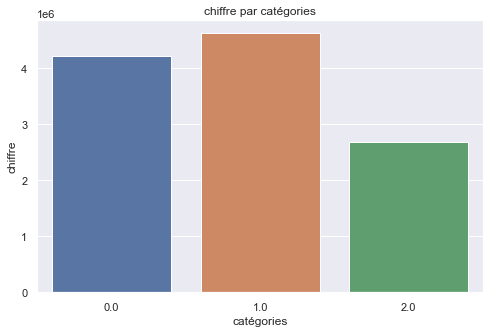

In [569]:
#Visualisation du chiffre par categories:

plt.figure(figsize=(8, 5))
sns.set_theme(style="darkgrid")

sns.barplot(data=chiffre_categorie, x=chiffre_categorie.categ, y=chiffre_categorie.ca)

plt.title('chiffre par catégories')
plt.xlabel('catégories')
plt.ylabel('chiffre')



plt.show()

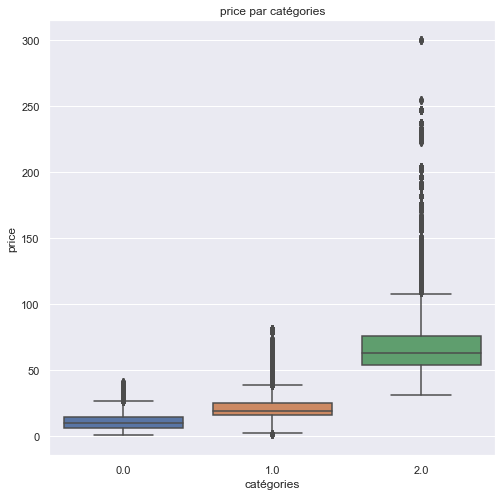

In [570]:
plt.figure(figsize=(8, 8))
sns.set_theme(style="darkgrid")

sns.boxplot(data=df, x=df.categ, y=df.price)

plt.title('price par catégories')
plt.xlabel('catégories')
plt.ylabel('price')



plt.show()

In [571]:
test = df.groupby(['id_prod', 'categ']).price.mean().reset_index()
test = test.rename(columns={'price':'ca'})
test

,id_prod,categ,ca
0,0_0,0.0,3.75
1,0_1,0.0,10.99
2,0_10,0.0,17.95
3,0_100,0.0,20.60
4,0_1000,0.0,6.84
...,...,...,...
3258,2_95,2.0,98.99
3259,2_96,2.0,47.91
3260,2_97,2.0,160.99
3261,2_98,2.0,149.74


In [572]:
#Test statistique (Student):
t, p = ttest_ind(test[test['categ'] == 1].ca, test[test['categ'] == 0].ca)
print('p_value:', p)

p_value: 3.614263855912892e-198


In [573]:
t, p = ttest_ind(test[test['categ'] == 2].ca, test[test['categ'] == 0].ca)
print('p_value:', p)

p_value: 0.0


In [574]:
t, p = ttest_ind(test[test['categ'] == 1].ca, test[test['categ'] == 2].ca)
print('p_value:', p)

p_value: 4.224774180438824e-205


In [575]:
#Test statistique (Anova):
f, p = f_oneway(test[test['categ'] == 1].ca, test[test['categ'] == 0].ca)
print('p_value:', p)

p_value: 3.6142638559065296e-198


In [576]:
f, p = f_oneway(test[test['categ'] == 2].ca, test[test['categ'] == 0].ca)
print('p_value:', p)

p_value: 0.0


In [577]:
f, p = f_oneway(test[test['categ'] == 1].ca, test[test['categ'] == 2].ca)
print('p_value:', p)

p_value: 4.224774180438876e-205


In [578]:
#test normalité (Shapiro-Wilk):
t, p = shapiro(test[test['categ'] == 0].ca)
print('p_value:', p)

p_value: 2.1718305732007215e-29


In [579]:
#panier moyen categorie 0:
nb_vente0 = df[df['categ'] == 0]
panier_moyen0 = nb_vente0.price.sum()/nb_vente0.session_id.count()
print('panier moyen categorie 0:', panier_moyen0.round(2))

panier moyen categorie 0: 10.64


In [580]:
#panier moyen categorie 1:
nb_vente1 = df[df['categ'] == 1]
panier_moyen1 = nb_vente1.price.sum()/nb_vente1.session_id.count()
print('panier moyen categorie 1:', panier_moyen1.round(2))

panier moyen categorie 1: 20.49


In [581]:
#panier moyen categorie 2:
nb_vente2 = df[df['categ'] == 2]
panier_moyen2 = nb_vente2.price.sum()/nb_vente2.session_id.count()
print('panier moyen categorie 2:', panier_moyen2.round(2))

panier moyen categorie 2: 76.27


#### Conclusion: L’analyse du CA par catégories, nous permet de validé le classement des catégories 2<0<1. Mais également de comprendre pourquoi la catégorie 2 est sous représenté dans le CA par rapport aux 2 autres. Cela est dû aux produits plus onéreux de cette catégorie. Le test de student effectué nous indique l’influence de la catégorie dans le chiffre généré.


#### Axe d’amélioration: Pour améliorer notre CA, d’après les dernières observation. Il faut mieux encadrer les prix des différents articles dans la catégories 2. Cela aura pour conséquence d’avoir plus de ventes pour cette catégories.

### 3) Analyse sur le profil clients et la répartition du chiffre d'affaire:

#### Etude en fonction du genre

In [582]:
#Dataframe:
df2 = df.groupby(['categ', 'sex']).price.sum().reset_index()
df2 = df2.rename(columns={'price' : 'ca'})
df2.head()

,categ,sex,ca
0,0.0,f,2.090415e+06
1,0.0,m,2.125250e+06
2,1.0,f,2.339170e+06
3,1.0,m,2.275215e+06
4,2.0,f,1.267843e+06


In [583]:
#Cas sex Homme:
df_h = df2[df2['sex'] == 'm'].groupby('categ').ca.sum().reset_index()
df_h.head()

,categ,ca
0,0.0,2.125250e+06
1,1.0,2.275215e+06
2,2.0,1.418256e+06


In [584]:
#Cas sex femme:
df_f = df2[df2['sex'] == 'f'].groupby('categ').ca.sum().reset_index()
df_f.head()

,categ,ca
0,0.0,2.090415e+06
1,1.0,2.339170e+06
2,2.0,1.267843e+06


In [585]:
#Chiffre homme:
print('chiffre homme:', df_h.ca.sum().round(2))

chiffre homme: 5818721.08


In [586]:
#Chiffre femme:
print('chiffre femme:', df_f.ca.sum().round(2))

chiffre femme: 5697428.38


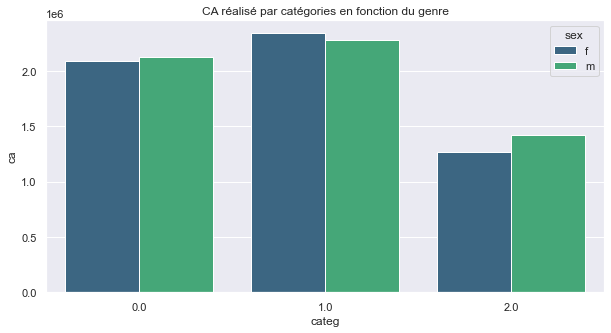

In [587]:
#Visualisation:
fig = plt.subplots(figsize=(10, 5))
sns.set_theme(style='darkgrid')
sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

sns.barplot(data=df2, x='categ', y='ca', hue='sex', palette='viridis')

plt.title("CA réalisé par catégories en fonction du genre")

plt.show()

In [588]:
#Tableau de contingence:
test1 = df[['categ', 'sex', 'session_id']]
test1 = pd.pivot_table(test1, index=['categ'], columns=['sex'], values=['session_id'], aggfunc='count')
test1

session_id        
sex            f       m
categ                   
0.0       196745  199522
1.0       113948  111279
2.0        16697   18519

In [589]:
#Test statistique (Chi2):
chi2, pval, dof, expected = chi2_contingency(test1)
print('p_value:', pval)

p_value: 4.654041575702618e-31


#### Conclusion: L’analyse par genre nous indique que le CA est bien répartie en fonction du genre. En revanche, on peut observé une légère disparité concernant l’intérêt des hommes et des femmes sur le choix des catégories d’achat. Le test du Chi2, nous indique bien une influence du sex concernant le chiffre généré par categories.

#### Axe d’amélioration: On pourrait suggérer à nos clients de sex féminin, des articles de la catégorie 1 et à nos clients de sex masculin, des articles de catégories 0 ou 2.

#### Lien entre l'année de naissance et le panier moyen:

In [590]:
#Dataframe:
df_p = df[['birth', 'price']].groupby('birth').price.mean().reset_index()
df_p = df_p.rename(columns={'price':'mean'})
df_p.head()

,birth,mean
0,1929,16.065729
1,1930,17.834414
2,1931,16.409695
3,1932,16.394676
4,1933,16.175096


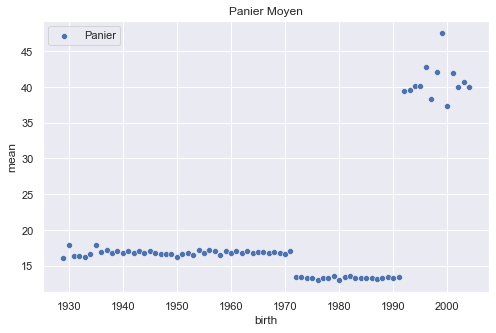

In [591]:
#Graphique panier moyen:
plt.figure(figsize=(8, 5))
sns.set_theme(style='darkgrid')

sns.scatterplot(data=df_p, x='birth', y='mean')

plt.title('Panier Moyen')

plt.legend(labels=(['Panier']))

plt.show()  

#### Etude par cluster d'age

In [592]:
#Dataframe:
df3 = df.groupby(['categ', 'birth']).price.sum().reset_index()
df3 = df3.rename(columns={'price' : 'ca'})
df3.head()

,categ,birth,ca
0,0.0,1929,691.99
1,0.0,1930,792.10
2,0.0,1931,842.82
3,0.0,1932,1289.36
4,0.0,1933,1385.00


In [593]:
#Cluster d'age:

cluster = []

for year in df3['birth']:
    if year >= 1996:
        year = '1/ <25'
    elif year >= 1981: 
        year = '2/ 25_40'
    else:
        year = '3/ 40+'
    cluster.append(year)


df3['cluster'] = cluster
df3.head()

,categ,birth,ca,cluster
0,0.0,1929,691.99,3/ 40+
1,0.0,1930,792.10,3/ 40+
2,0.0,1931,842.82,3/ 40+
3,0.0,1932,1289.36,3/ 40+
4,0.0,1933,1385.00,3/ 40+


In [594]:
df3_c = df3.groupby(['cluster', 'categ']).ca.sum().reset_index()
df3_c.head()

,cluster,categ,ca
0,1/ <25,0.0,122359.70
1,1/ <25,1.0,446659.15
2,1/ <25,2.0,1805786.97
3,2/ 25_40,0.0,1706569.79
4,2/ 25_40,1.0,1185019.77


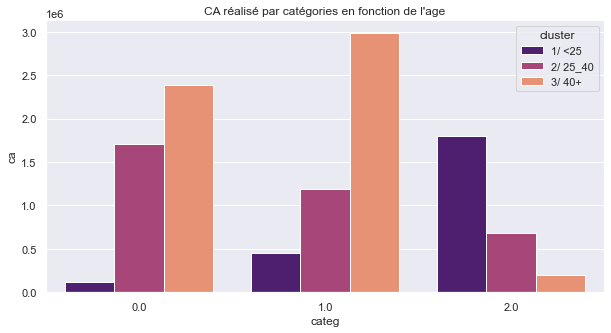

In [595]:
#Visualisation:
fig = plt.subplots(figsize=(10, 5))
sns.set_theme(style='darkgrid')
sns.color_palette("rocket")

sns.barplot(data=df3_c, x=df3_c.categ, y=df3_c.ca, hue=df3_c.cluster, palette='magma')

plt.title("CA réalisé par catégories en fonction de l'age")

plt.show()

In [596]:
test2 = df3.groupby(['cluster', 'categ']).ca.mean().reset_index()
test2

,cluster,categ,ca
0,1/ <25,0.0,13595.522222
1,1/ <25,1.0,49628.794444
2,1/ <25,2.0,200642.996667
3,2/ 25_40,0.0,113771.319333
4,2/ 25_40,1.0,79001.318000
5,2/ 25_40,2.0,45569.431333
6,3/ 40+,0.0,45898.762115
7,3/ 40+,1.0,57359.735385
8,3/ 40+,2.0,3784.052692


In [597]:
#Tableau de contingence:
test2_1 = pd.pivot_table(test2, index='categ', columns='cluster', values='ca')
test2_1

cluster,1/ <25,2/ 25_40,3/ 40+
categ,,,
0.0,13595.522222,113771.319333,45898.762115
1.0,49628.794444,79001.318000,57359.735385
2.0,200642.996667,45569.431333,3784.052692


In [598]:
#Test statistique (Chi2):
chi2, pval, dof, expected = chi2_contingency(test2_1)
print('p_value:', pval)

p_value: 0.0


In [599]:
#CA par tranche d'age:
df3_c2 = df3_c.groupby('cluster').ca.sum().reset_index()
df3_c2

,cluster,ca
0,1/ <25,2374805.82
1,2/ 25_40,3575131.03
2,3/ 40+,5566212.61


#### Analyse sur l'année de naissance et le montant total:

In [600]:
#Dataframe groupé par année de naissance:
df_a = df3.groupby('birth').ca.sum().reset_index()
df_a.head()

,birth,ca
0,1929,3197.08
1,1930,3959.24
2,1931,2691.19
3,1932,4803.64
4,1933,5078.98


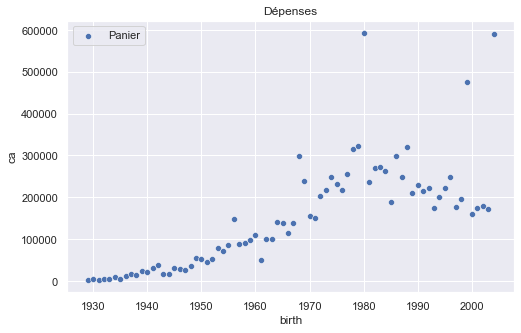

In [601]:
#Graphique groupé par année de naissance:
plt.figure(figsize=(8, 5))
sns.set_theme(style='darkgrid')

sns.scatterplot(data=df_a, x='birth', y='ca')

plt.title('Dépenses')

plt.legend(labels=(['Panier']))

plt.show()       

In [602]:
#test de corrélation (pearson):
t, p = pearsonr(df_a.birth, df_a.ca)
print('corrélation:', t)

corrélation: 0.7789832592133058


In [603]:
#Vérification de la corrélation pour l'année de naissance <= 1980:
df_a2 = df_a[df_a['birth'] <= 1980]
df_a2.head()

,birth,ca
0,1929,3197.08
1,1930,3959.24
2,1931,2691.19
3,1932,4803.64
4,1933,5078.98


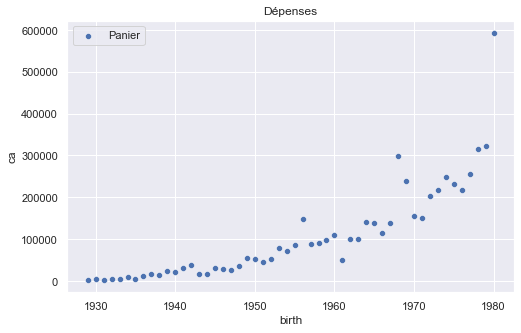

In [604]:
#Graphique groupé par année de naissance:
plt.figure(figsize=(8, 5))
sns.set_theme(style='darkgrid')

sns.scatterplot(data=df_a2, x='birth', y='ca')

plt.title('Dépenses')

plt.legend(labels=(['Panier']))

plt.show() 

In [605]:
#test de corrélation (pearsonr):
t, p = pearsonr(df_a2.ca, df_a2.birth)
print('corrélation:', t)

corrélation: 0.8478060785507859


#### Lien entre l'année de naissance et la fréquence d'achat:

In [606]:
#Cluster d'age:

cluster = []

for year in df['birth']:
    if year >= 1996:
        year = '1/ <25'
    elif year >= 1981:
        year = '2/ 25_40'
    else:
        year = '3/ 40+'
    cluster.append(year)

df['cluster'] = cluster
df.head()

,id_prod,date,session_id,client_id,reference,heure,year,month,day,price,categ,sex,birth,cluster
0,0_1518,2022-05-20,s_211425,c_103,43970,13:21:29,2022,5,20,4.18,0.0,f,1986,2/ 25_40
1,1_251,2022-02-02,s_158752,c_8534,149409,07:55:19,2022,2,2,15.99,1.0,m,1988,2/ 25_40
2,0_1277,2022-06-18,s_225667,c_6714,155329,15:44:33,2022,6,18,7.99,0.0,f,1968,3/ 40+
3,2_209,2021-06-24,s_52962,c_6941,835891,04:19:29,2021,6,24,69.99,2.0,m,2000,1/ <25
4,0_1509,2023-01-11,s_325227,c_4232,194479,08:22:08,2023,1,11,4.99,0.0,m,1980,3/ 40+


In [607]:
#Calcul de la fréquence d'achat pour 2022:
df_a2 = df[['session_id', 'cluster', 'client_id', 'price', 'year']]
nb_transaction = df_a2[df_a2['year']== 2022].groupby('cluster').session_id.nunique()
nb_client = df_a2.groupby('cluster').client_id.nunique()
frequence = nb_transaction / nb_client
frequence.round(2)

cluster
1/ <25      10.96
2/ 25_40    20.88
3/ 40+      23.33
dtype: float64

#### Conclusion: L’analyse par cluster d'âge est intéressante, elle permet de faire ressortir plusieurs informations. En effet, on peut observer que la majeur partie du CA est réalisé par les 25_40 et 40+. Que ces 2 clusters sont sur-représentés dans les categories 1 et 0. En revanche le cluster <25 est en tête dans la catégorie 2.


#### Axe d’amélioration: D’un point de vue marketing, pour en améliorer nos ventes et faire croitre notre CA. Il serait judicieux de proposer des articles en fonction du cluster d’age. Mais aussi, de réaliser des campagnes promotionnelles sur la catégorie 2. Car nos clients, les plus susceptibles d’acheter de la catégorie2, sont également ceux qui ont le moins de pouvoir d’achat. Et, on sait également que la catégorie 2 est la catégorie qui propose les articles, les plus onéreux.

### 4) Visualisation à l'aide d'une courbe de lorentz:

#### Courbe de lorentz:

In [608]:
#Dataframe croissant:
df_l = df[['client_id', 'session_id', 'price']]
client = df_l.groupby('client_id').price.sum().reset_index()
client2 = client.sort_values(by='price', ascending=False)
client2

,client_id,price
677,c_1609,312400.27
4387,c_4958,281546.08
6336,c_6714,149538.49
2723,c_3454,111766.71
2108,c_2899,5214.05
...,...,...
1556,c_240,11.06
7888,c_8114,9.98
7917,c_8140,8.30
8598,ct_0,0.00


In [609]:
#centile client:
total_client = client2.client_id.count()
centile = pd.qcut(range(len(client2.client_id)), 100, labels=False)
client2['centile'] = centile
client2

,client_id,price,centile
677,c_1609,312400.27,0
4387,c_4958,281546.08,0
6336,c_6714,149538.49,0
2723,c_3454,111766.71,0
2108,c_2899,5214.05,0
...,...,...,...
1556,c_240,11.06,99
7888,c_8114,9.98,99
7917,c_8140,8.30,99
8598,ct_0,0.00,99


In [610]:
#Pourcentage par centile:
client3 = client2.groupby('centile').price.sum().reset_index()
client3['pourcentage'] = client3.price/client3.price.sum()
client3['cumule'] = client3.pourcentage.cumsum()
client3

,centile,price,pourcentage,cumule
0,0,1223875.67,0.106275,0.106275
1,1,337953.97,0.029346,0.135621
2,2,311154.87,0.027019,0.162640
3,3,292464.13,0.025396,0.188036
4,4,278078.12,0.024147,0.212183
...,...,...,...,...
95,95,14315.80,0.001243,0.997165
96,96,12306.82,0.001069,0.998234
97,97,9837.36,0.000854,0.999088
98,98,7126.48,0.000619,0.999707


In [611]:
#Standardization des centiles:
mini = np.min(client3.centile)
maxi = np.max(client3.centile)
var = maxi-mini
standardize2 = [(i-mini)/var for i in client3.centile]
client3['stand_centile'] = standardize2
client3

,centile,price,pourcentage,cumule,stand_centile
0,0,1223875.67,0.106275,0.106275,0.000000
1,1,337953.97,0.029346,0.135621,0.010101
2,2,311154.87,0.027019,0.162640,0.020202
3,3,292464.13,0.025396,0.188036,0.030303
4,4,278078.12,0.024147,0.212183,0.040404
...,...,...,...,...,...
95,95,14315.80,0.001243,0.997165,0.959596
96,96,12306.82,0.001069,0.998234,0.969697
97,97,9837.36,0.000854,0.999088,0.979798
98,98,7126.48,0.000619,0.999707,0.989899


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


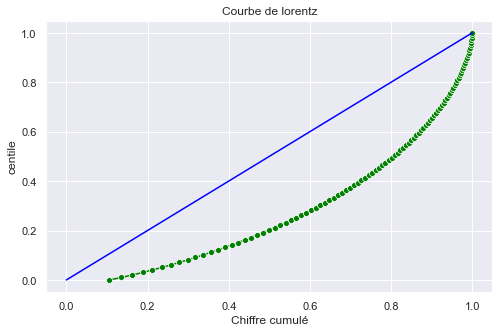

In [612]:
#Calcul de la courbe:
plt.figure(figsize=(8, 5))
sns.set_theme(style='darkgrid')

sns.lineplot(client3.cumule, client3.stand_centile, marker='o', color='green')
sns.lineplot([0,1], [0,1], color='blue')

plt.title('Courbe de lorentz')
plt.xlabel('Chiffre cumulé')
plt.ylabel('centile')

plt.show()

#### Indice de gini:

In [613]:
#calcul indice de gini:
def gini(array):
    
    
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

print('coefficient de gini:', gini(client3.price).round(2))

coefficient de gini: 0.45


#### Conclusion: Analyse de la courbe de lorentz et de l'indice de gini. Nous indique une repartition des ventes inégalitaire. Car comme on peut le voir sur la courbe de lorentz, 80% du CA est réalisé par 50% des clients. D'ailleurs le coefficient de gini nous indique une inégalité de 45% sur le CA.

### 2) Relation entre la référence 0_525 et 2_159:

#### Lien & Probabilité d'achat sur la ref 0_525, si le client à déjà la ref 2_159:

In [614]:
df_r = df[['id_prod','client_id', 'date']]
df_r = df_r[(df_r['id_prod'] == '0_525') | (df_r['id_prod'] == '2_159')].reset_index()
df_r.head()

,index,id_prod,client_id,date
0,258,2_159,c_6135,2023-02-03
1,1050,0_525,c_1403,2021-04-01
2,1184,2_159,c_4222,2022-01-24
3,1297,0_525,c_7285,2021-09-24
4,2248,2_159,c_2469,2022-04-16


In [615]:
#probabilité:
ref_0_525 = df_r[df_r['id_prod'] == '0_525']
print('nombre de clients pour la ref 0_525:', ref_0_525.client_id.nunique())

nombre de clients pour la ref 0_525: 450


In [616]:
ref_2_159 = df_r[df_r['id_prod'] == '2_159']
print('nombre de clients pour la ref 2_159:', ref_2_159.client_id.nunique())

nombre de clients pour la ref 2_159: 514


In [617]:
df_r2 = ref_2_159.merge(ref_0_525, how='inner', on='client_id')
df_r2.head()

,index_x,id_prod_x,client_id,date_x,index_y,id_prod_y,date_y
0,258,2_159,c_6135,2023-02-03,406952,0_525,2023-02-03
1,1184,2_159,c_4222,2022-01-24,540235,0_525,2022-01-24
2,4439,2_159,c_5565,2022-11-29,343868,0_525,2022-11-29
3,7878,2_159,c_8481,2021-07-21,444861,0_525,2021-07-21
4,8134,2_159,c_5993,2022-06-03,58437,0_525,2022-06-03


In [618]:
df_r2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index_x    700 non-null    int64         
 1   id_prod_x  700 non-null    object        
 2   client_id  700 non-null    object        
 3   date_x     700 non-null    datetime64[ns]
 4   index_y    700 non-null    int64         
 5   id_prod_y  700 non-null    object        
 6   date_y     700 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 43.8+ KB


In [619]:
df_r2.duplicated(subset=('client_id')).sum()

250

In [620]:
df_r2 = df_r2.drop_duplicates(subset=('client_id')).reset_index()

In [621]:
lien = df_r2.client_id.nunique()
print('clients ayant achetés les 2 reférences:', lien)

clients ayant achetés les 2 reférences: 450


In [622]:
client1 = ref_2_159.client_id.nunique()
p1 = lien/client1
print("probabilité d'achat:", '{:.2%}'.format(p1))

probabilité d'achat: 87.55%


In [623]:
df_r3 = df_r2[df_r2['date_x'] <= df_r2['date_y']]
client2 = df_r3.client_id.nunique()
p2 = client2/client1
print("probabilité d'achat si le client à déjà la ref 2_159 ", '{:,.2%}'.format(p2))

probabilité d'achat si le client à déjà la ref 2_159  86.58%


#### Conclusion: L’analyse effectuer sur les références (0_525 et 2_159), nous permet effectivement d'établir un lien entre ces 2 réf. La probabilité d'achat sur la réf 0_525, si le client à déjà la réf 2_159 est de 86.58%.

#### Axe d’amélioration: Suggérer l’article complémentaire dès lors que l’un de nos clients ajoute l’une des deux références à son panier. Effectuer des campagnes promotionnelles pour l’achat des deux articles.